# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


### 의료 데이터 분석의 현재


### Accuracy, Precision, 그리고 Recall

## Step 1. 데이터셋 준비하기

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [8]:
import os

In [9]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기

os.environ['KAGGLE_USERNAME'] = 'fastcampuskim'
os.environ['KAGGLE_KEY'] = 'c939a1e37f5ca93b6406a66fc8bb08e5'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [10]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip '*.zip'

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 1.57MB/s]
Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [11]:
!ls

heart-failure-clinical-data.zip		    sample_data
heart_failure_clinical_records_dataset.csv


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [12]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [15]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())

df.head(5)



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,90.0,1,337,0,38,0,390000.00,0.9,144,0,0,256,0
290,45.0,0,615,1,55,0,222000.00,0.8,141,0,0,257,0
291,60.0,0,320,0,35,0,133000.00,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.00,1.0,140,1,1,258,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [17]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 문제 5. 수치형 데이터의 히스토그램 그리기


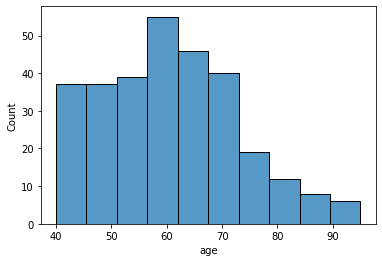

In [18]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기

sns.histplot(x='age', data=df)



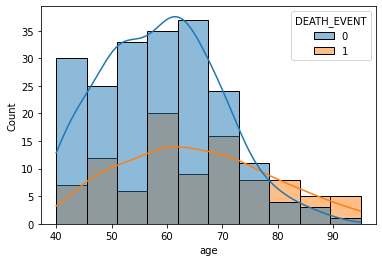

In [20]:
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

In [21]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

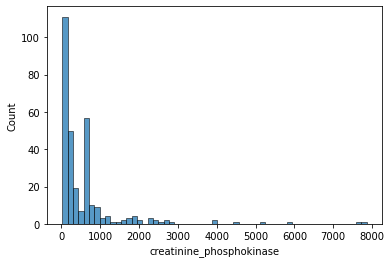

In [22]:
sns.histplot(x='creatinine_phosphokinase', data=df)

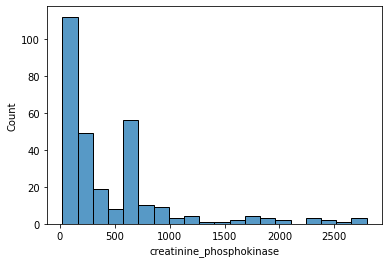

In [23]:
# outlier 배제하고 작은 수 값만 자세히 확인하기

sns.histplot(x=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'], data=df)

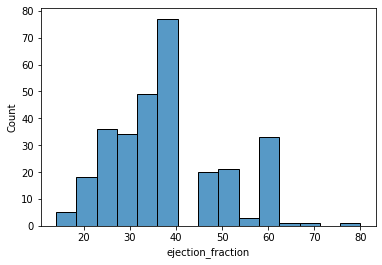

In [40]:
sns.histplot(x='ejection_fraction', data=df)

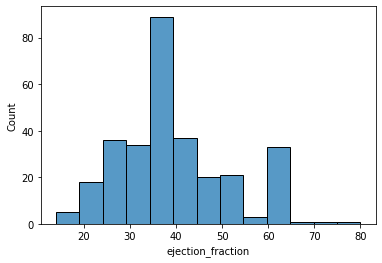

In [24]:
sns.histplot(x='ejection_fraction', data=df, bins=13)

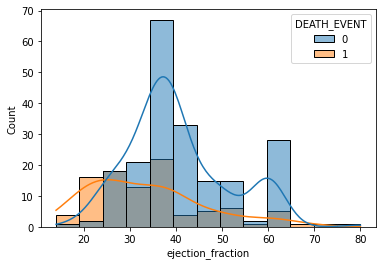

In [26]:
sns.histplot(x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT', kde=True)

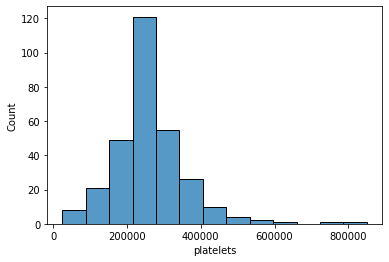

In [27]:
sns.histplot(x='platelets', data=df, bins=13)

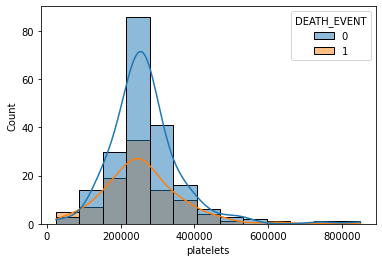

In [28]:
sns.histplot(x='platelets', data=df, bins=13, hue='DEATH_EVENT', kde=True)

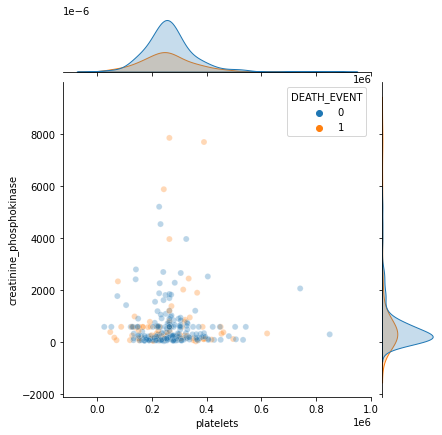

In [32]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)

### 문제 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


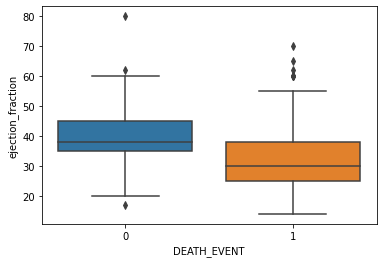

In [33]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
# Hint) hue 키워드를 사용하여 범주 세분화 가능


sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)


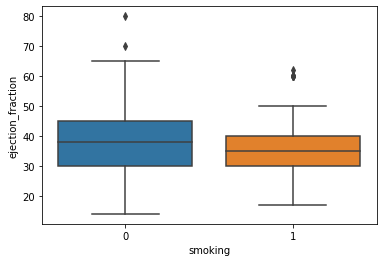

In [34]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df)

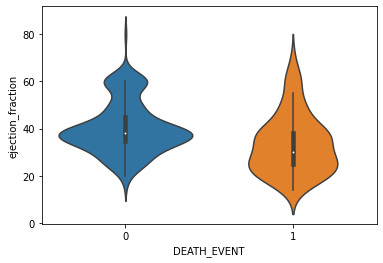

In [36]:
sns.violinplot(x='DEATH_EVENT',  y='ejection_fraction', data=df) # 히스토그램 + 박스플롯의 사분위수

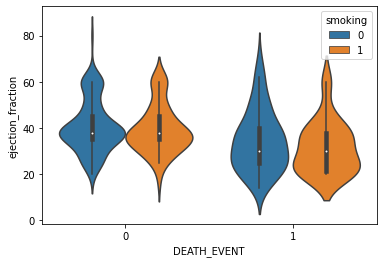

In [37]:
sns.violinplot(x='DEATH_EVENT',  y='ejection_fraction', hue='smoking', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


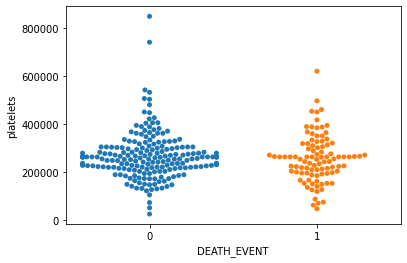

In [38]:
sns.swarmplot(x='DEATH_EVENT',  y='platelets', data=df) # scatter 플롯 + 바이올린 플롯

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


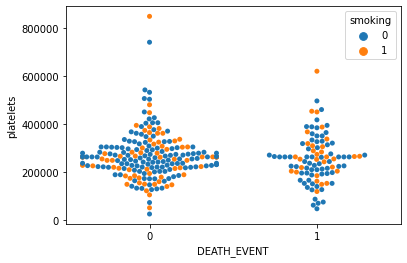

In [39]:
sns.swarmplot(x='DEATH_EVENT',  y='platelets', hue='smoking', data=df)

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [75]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase', 'ejection_fraction',  'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [76]:
# check
X_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


In [77]:
X_cat.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


In [78]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num) # StandardScaler()를 통과하면 값이 DF -> array가 됨
X_scaled = pd.DataFrame(data= X_scaled, index= X_num.index, columns= X_num.columns) # 다시 DF 으로 변환해주는 작업

X = pd.concat([X_scaled, X_cat], axis=1) # 수치형 데이터s + 범주형 데이터s 다시 붙이기

In [79]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=False)

In [82]:
X_train

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
204,1.445579,-0.534591,0.162199,1.397162e-01,-0.671857,0.085034,0.732266,1,0,0,1,1
205,-0.912335,-0.428259,0.585389,1.010256e+00,-0.381379,-0.141976,0.732266,1,1,0,0,0
206,-1.754448,-0.496394,0.162199,-3.826077e-01,-0.575031,0.993074,0.732266,1,0,0,0,0
207,2.035057,-0.381804,-0.007077,-7.922736e-01,-0.478205,-0.141976,0.732266,0,0,0,1,0


In [83]:
X_test

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
209,-0.996547,0.402782,-0.260991,0.047541,-0.575031,-1.504036,0.732266,0,1,1,0,0
210,0.771889,-0.381804,-1.784473,1.286781,-0.381379,-0.141976,0.745172,0,1,1,1,1
211,-0.912335,0.000166,2.024234,-1.191698,-0.575031,0.766064,0.796795,0,0,1,1,1
212,1.445579,-0.369415,1.008578,2.229012,0.005926,0.312044,0.796795,0,0,0,1,1
213,-1.080758,-0.465424,-0.684180,-0.198258,0.199578,-1.504036,0.809701,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765,-0.284552,1.447094,1.803451,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,0.068025,-0.187726,0.539054,1.816357,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082,-0.575031,0.312044,1.906697,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389,0.005926,0.766064,1.932509,0,0,0,1,1


In [84]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
204    0
205    0
206    0
207    0
208    0
Name: DEATH_EVENT, Length: 209, dtype: int64

In [85]:
y_test

209    0
210    0
211    0
212    0
213    1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 90, dtype: int64

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=1000, verbose=2)
model_lr.fit(X_train, y_train)




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

### 문제 10. 모델 학습 결과 평가하기


In [88]:
from sklearn.metrics import classification_report

In [89]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))




              precision    recall  f1-score   support

           0       0.92      0.99      0.95        83
           1       0.00      0.00      0.00         7

    accuracy                           0.91        90
   macro avg       0.46      0.49      0.48        90
weighted avg       0.85      0.91      0.88        90



### 문제 11. XGBoost 모델 생성/학습하기


In [90]:
from xgboost import XGBClassifier

In [91]:
# XGBClassifier 모델 생성/학습

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 문제 12. 모델 학습 결과 평가하기


In [92]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))




              precision    recall  f1-score   support

           0       0.94      1.00      0.97        83
           1       1.00      0.29      0.44         7

    accuracy                           0.94        90
   macro avg       0.97      0.64      0.71        90
weighted avg       0.95      0.94      0.93        90



### 문제 13. 특징의 중요도 확인하기


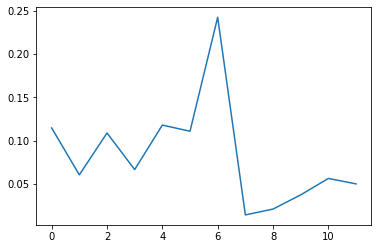

In [93]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot

plt.plot(model_xgb.feature_importances_)



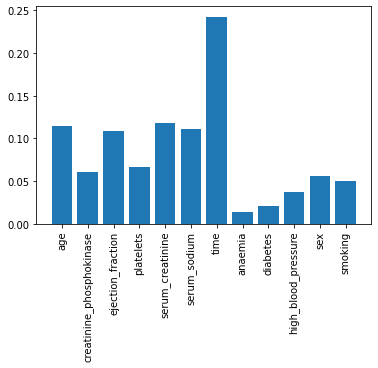

In [95]:
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90) # 90도 로테이션
plt.show()

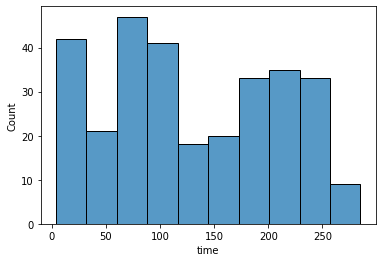

In [96]:
sns.histplot(x='time', data=df)

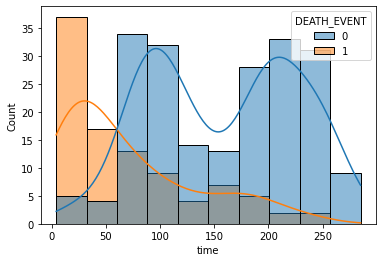

In [97]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)
# Data Leakage 현상 존재 - 'time' 정보에는 이미 'DEATH_EVENT' 정보가 포함되어 있었다.

In [ ]:
#### 'time' 제거 후 다시 학습

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [ ]:
#from sklearn.preprocessing import StandardScaler

In [125]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [126]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase', 'ejection_fraction',  'platelets', 'serum_creatinine', 'serum_sodium']] # 'time' 제거
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [127]:
# check
X_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116


In [128]:
X_cat.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


In [129]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num) # StandardScaler()를 통과하면 값이 DF -> array가 됨
X_scaled = pd.DataFrame(data= X_scaled, index= X_num.index, columns= X_num.columns) # 다시 DF 으로 변환해주는 작업

X = pd.concat([X_scaled, X_cat], axis=1) # 수치형 데이터s + 범주형 데이터s 다시 붙이기

In [130]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [103]:
#from sklearn.model_selection import train_test_split

In [131]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=False)

## Step 4. Classification 모델 학습하기

### 문제 9. Logistic Regression 모델 생성/학습하기


In [ ]:
#from sklearn.linear_model import LogisticRegression

In [132]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=1000, verbose=2)
model_lr.fit(X_train, y_train)




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

### 문제 10. 모델 학습 결과 평가하기


In [106]:
#from sklearn.metrics import classification_report

In [133]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))




              precision    recall  f1-score   support

           0       0.99      0.82      0.89        83
           1       0.29      0.86      0.43         7

    accuracy                           0.82        90
   macro avg       0.64      0.84      0.66        90
weighted avg       0.93      0.82      0.86        90



### 문제 11. XGBoost 모델 생성/학습하기


In [108]:
#from xgboost import XGBClassifier

In [134]:
# XGBClassifier 모델 생성/학습

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 문제 12. 모델 학습 결과 평가하기


In [135]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))




              precision    recall  f1-score   support

           0       0.98      0.71      0.83        83
           1       0.20      0.86      0.32         7

    accuracy                           0.72        90
   macro avg       0.59      0.78      0.57        90
weighted avg       0.92      0.72      0.79        90



### 문제 13. 특징의 중요도 확인하기


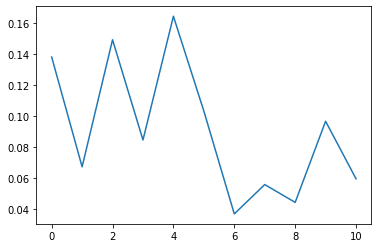

In [136]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot

plt.plot(model_xgb.feature_importances_)



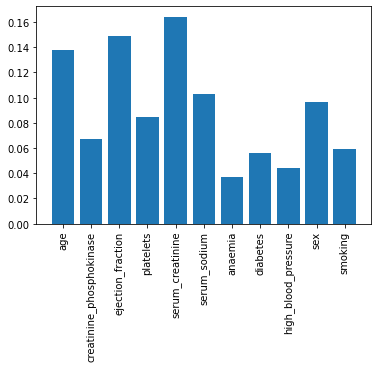

In [137]:
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90) # 90도 로테이션
plt.show()

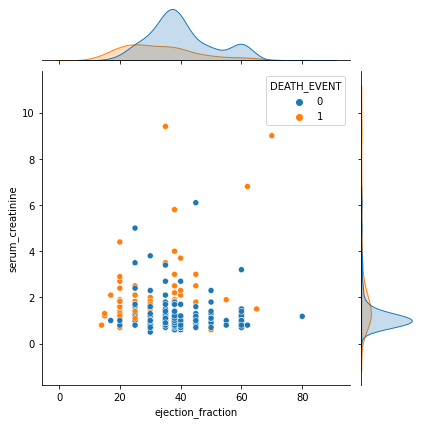

In [113]:
#### 1순위 'serum_creatinine'과 2순위 'ejection_fraction' joint_plot 파악해보기

sns.jointplot(x='ejection_fraction', y = 'serum_creatinine', data=df, hue='DEATH_EVENT')

## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Precision-Recall 커브 확인하기

In [115]:
from sklearn.metrics import plot_precision_recall_curve

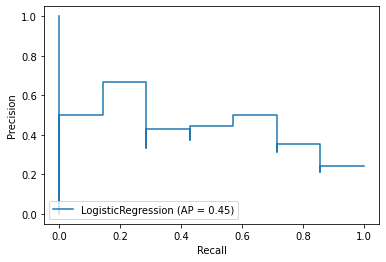

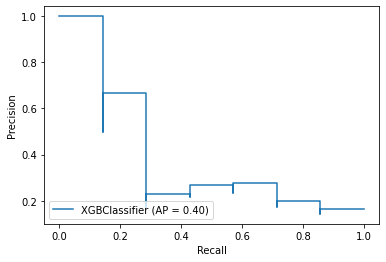

In [119]:
plot_precision_recall_curve(model_lr, X_test, y_test)
plot_precision_recall_curve(model_xgb, X_test, y_test)

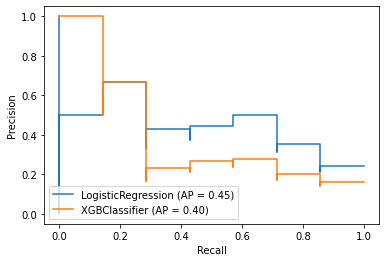

In [120]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()

plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax) # 하나의 figure 그래프에 같이 나타내도록 조치
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)

### 문제 15. ROC 커브 확인하기

In [122]:
from sklearn.metrics import plot_roc_curve

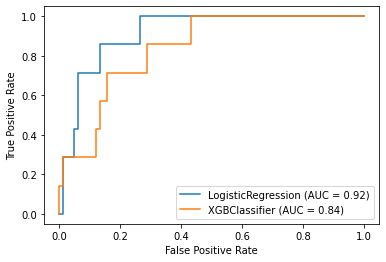

In [124]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)

fig = plt.figure()
ax = fig.gca()

plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)

# False Positive Rate 가 낮으면서 True Positive Rate가 높은 경우가 더 좋은 모델 !